In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import pickle


In [2]:
# loadve true_muons_only_df to pickle
with open('true_muons_only_df.pkl', 'rb') as f:
    true_muons_only_df = pickle.load(f)

true_muons_only_df

,true_particle_interaction_id,true_particle_match_reco_particle_id,true_particle_contained,true_particle_primary,true_particle_pdg_code,true_start_point_x,true_start_point_y,true_start_point_z,true_start_dir_x,true_start_dir_y,...,matching_reco_particle_start_dir_y,matching_reco_particle_start_dir_z,matching_reco_particle_end_point_x,matching_reco_particle_end_point_y,matching_reco_particle_end_point_z,matching_reco_particle_ke,matching_reco_particle_mcs_ke,matching_reco_particle_csda_ke,matching_reco_particle_calo_ke,matching_reco_particle_length
0,0,47,0,1,13,-31.049988,-34.649994,388.549988,0.049323,-0.112312,...,-0.130096,0.991325,-22.649994,-47.250000,504.650055,1023.906982,1023.906995,296.171418,227.863602,121.751724
1,0,37,0,1,13,165.949982,-119.882248,281.850006,0.571530,-0.132040,...,-0.123902,0.801740,201.149994,-124.650009,331.850037,301.526703,301.526716,336.280296,130.528778,61.659100
2,0,31,1,1,13,142.649994,178.350006,158.450012,-0.281430,-0.955447,...,-0.964863,0.049923,113.550018,82.950012,167.750000,252.586823,245.403328,252.586818,222.481598,101.084869
3,0,19,0,1,13,-152.850006,160.049957,362.450012,-0.869673,-0.242125,...,-0.275666,0.453987,-200.850006,148.050018,389.450012,270.060120,270.060115,316.480422,145.743439,55.857864
4,0,37,1,1,13,-43.950012,101.850006,413.450012,0.241628,-0.945283,...,-0.941021,0.247631,-13.350006,-18.450012,471.650055,336.919739,316.936243,336.919725,298.021484,141.081619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0,55,0,1,13,-57.449997,-14.549988,350.450012,-0.083291,-0.284923,...,-0.265137,0.959320,-72.449997,-67.650009,505.250031,1158.544312,1158.544324,390.254385,299.102905,166.268951
965,0,25,0,1,13,181.250000,-125.882248,421.649994,0.395158,-0.779499,...,-0.785912,0.469714,201.149994,-166.350006,444.650024,669.868530,669.868538,145.640209,102.187111,50.802715
966,0,21,1,1,13,131.250000,-42.149994,312.950012,0.417270,0.318282,...,0.286412,0.843208,166.350006,-23.850006,366.350037,182.198868,220.008012,182.198862,149.431152,67.778130
967,0,49,1,1,13,2.149994,-17.882263,195.749969,0.088355,-0.312550,...,0.539764,0.831794,1.950012,-17.250000,195.050018,191.071121,236.509731,191.071124,149.244141,66.503365


In [3]:
true_muons_only_df.columns

Index(['true_particle_interaction_id', 'true_particle_match_reco_particle_id',
       'true_particle_contained', 'true_particle_primary',
       'true_particle_pdg_code', 'true_start_point_x', 'true_start_point_y',
       'true_start_point_z', 'true_start_dir_x', 'true_start_dir_y',
       'true_start_dir_z', 'true_end_point_x', 'true_end_point_y',
       'true_end_point_z', 'true_ke', 'true_length',
       'matching_reco_particle_id', 'matching_reco_particle_contained',
       'matching_reco_particle_primary', 'matching_reco_particle_pdg_code',
       'matching_reco_particle_start_point_x',
       'matching_reco_particle_start_point_y',
       'matching_reco_particle_start_point_z',
       'matching_reco_particle_start_dir_x',
       'matching_reco_particle_start_dir_y',
       'matching_reco_particle_start_dir_z',
       'matching_reco_particle_end_point_x',
       'matching_reco_particle_end_point_y',
       'matching_reco_particle_end_point_z', 'matching_reco_particle_ke',
       '

In [4]:
start_dir_x = true_muons_only_df["true_start_dir_x"].to_numpy()
start_dir_y = true_muons_only_df["true_start_dir_y"].to_numpy()
start_dir_z = true_muons_only_df["true_start_dir_z"].to_numpy()

true_muons_only_df["true_angle_from_x_dir"] = np.arccos(start_dir_x / np.sqrt(start_dir_x**2 + start_dir_y**2 + start_dir_z**2)) * 180 / np.pi
true_muons_only_df["true_angle_from_x_axis"] = 90 - np.abs(true_muons_only_df["true_angle_from_x_dir"].to_numpy() - 90)


In [5]:
true_muons_only_df["mcs_true_ratio"] = true_muons_only_df["matching_reco_particle_mcs_ke"] / true_muons_only_df["true_ke"]


In [6]:
contained_df = true_muons_only_df.query('true_particle_contained == True')
uncontained_df = true_muons_only_df.query('true_particle_contained == False')

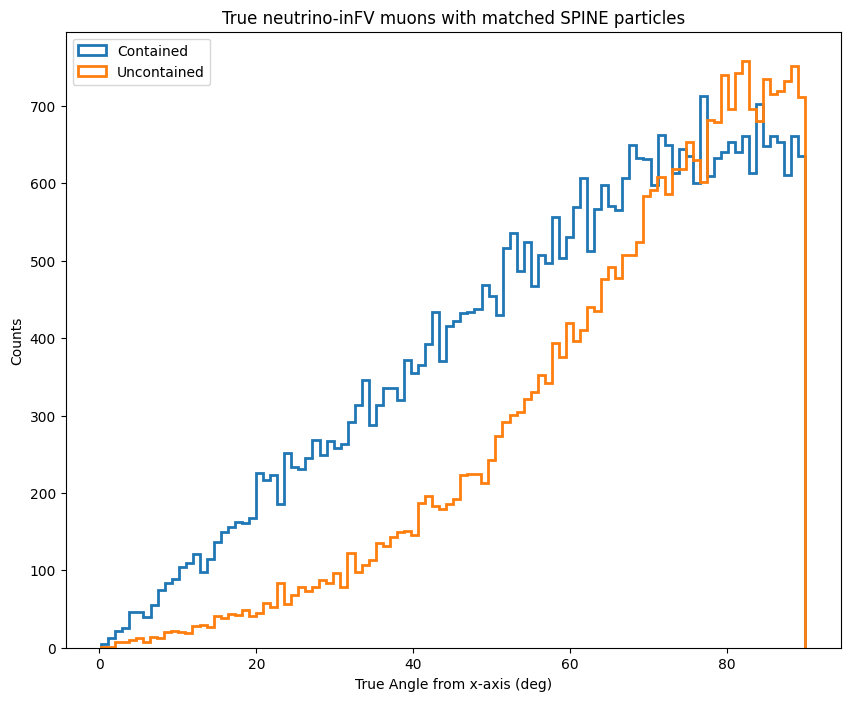

In [7]:
plt.figure(figsize=(10, 8))
plt.hist(contained_df['true_angle_from_x_axis'], bins=100, histtype='step', lw=2, label='Contained')
plt.hist(uncontained_df['true_angle_from_x_axis'], bins=100, histtype='step', lw=2, label='Uncontained')
plt.xlabel("True Angle from x-axis (deg)")
plt.ylabel("Counts")
plt.title("True neutrino-inFV muons with matched SPINE particles")
plt.legend()
plt.show()

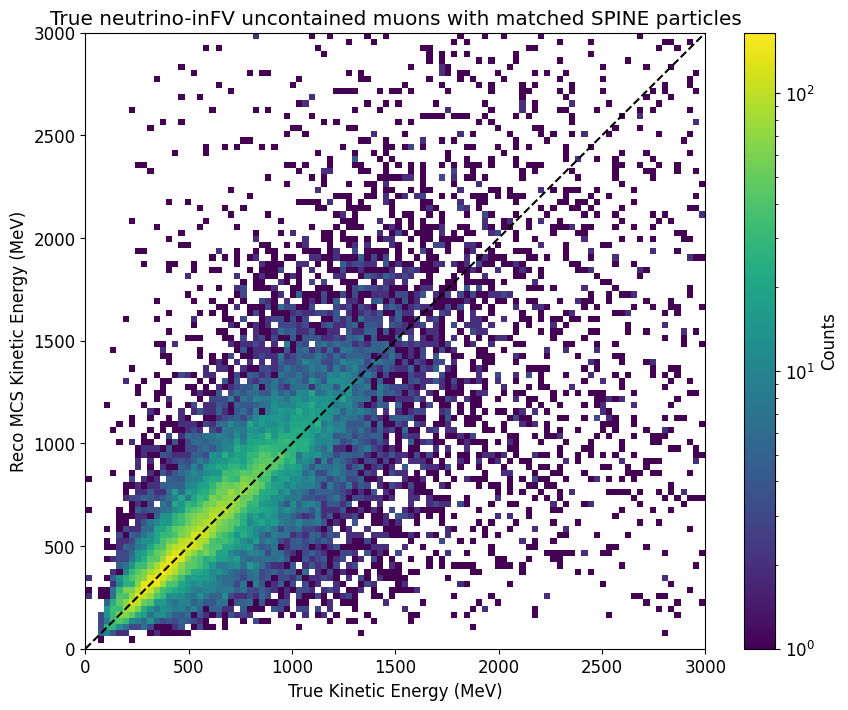

In [8]:
mpl.rcParams['font.size'] = 12

r = (0, 3000)
bins = 100
plt.figure(figsize=(10, 8))
plt.hist2d(uncontained_df['true_ke'], uncontained_df['matching_reco_particle_mcs_ke'], bins=bins, range=[r, r], norm=mpl.colors.LogNorm())
plt.plot(r, r, 'k--')
plt.colorbar(label='Counts')
plt.xlim(r)
plt.ylim(r)
plt.xlabel('True Kinetic Energy (MeV)')
plt.ylabel('Reco MCS Kinetic Energy (MeV)')
plt.title("True neutrino-inFV uncontained muons with matched SPINE particles")
plt.show()


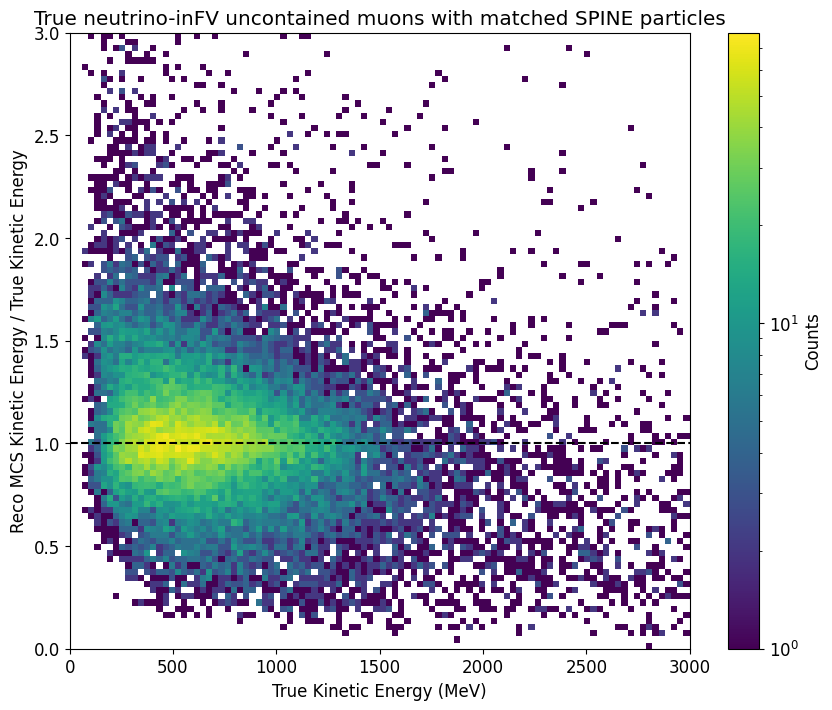

In [9]:
bins = (np.linspace(0, 3000, 101), np.linspace(0, 3, 101))

plt.figure(figsize=(10, 8))
plt.hist2d(uncontained_df['true_ke'], uncontained_df['mcs_true_ratio'], bins=bins, norm=mpl.colors.LogNorm())
plt.plot([bins[0][0], bins[0][-1]], [1, 1], 'k--')
plt.colorbar(label='Counts')
plt.xlim(bins[0][0], bins[0][-1])
plt.ylim(bins[1][0], bins[1][-1])
plt.xlabel("True Kinetic Energy (MeV)")
plt.ylabel("Reco MCS Kinetic Energy / True Kinetic Energy")
plt.title("True neutrino-inFV uncontained muons with matched SPINE particles")
plt.show()


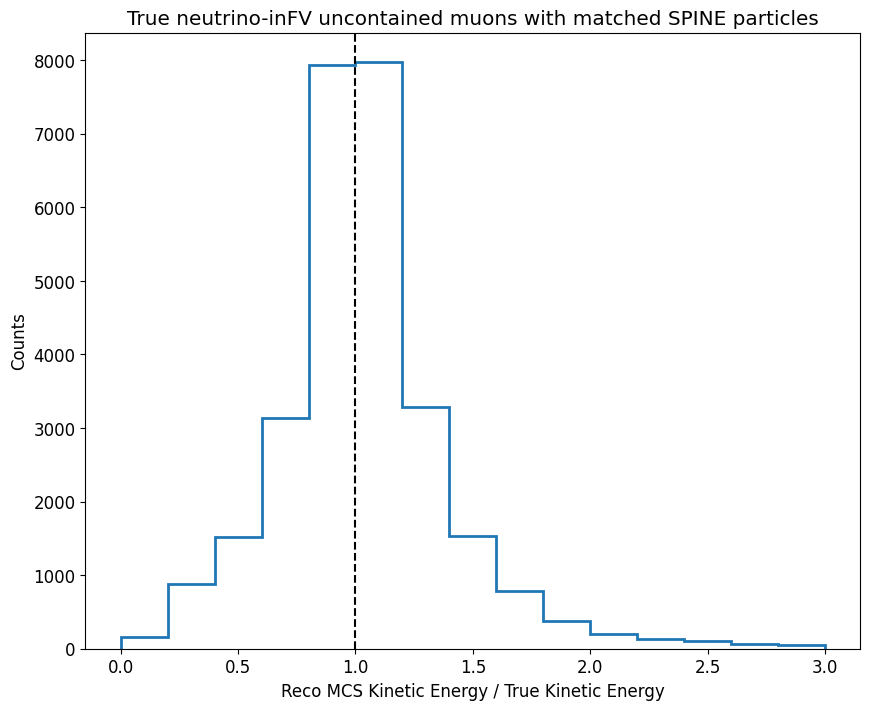

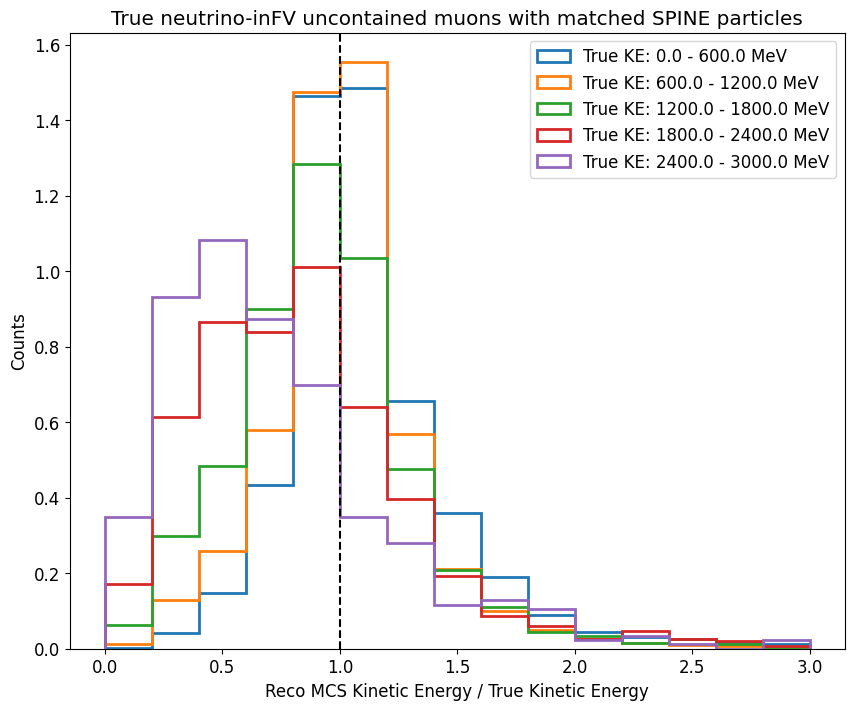

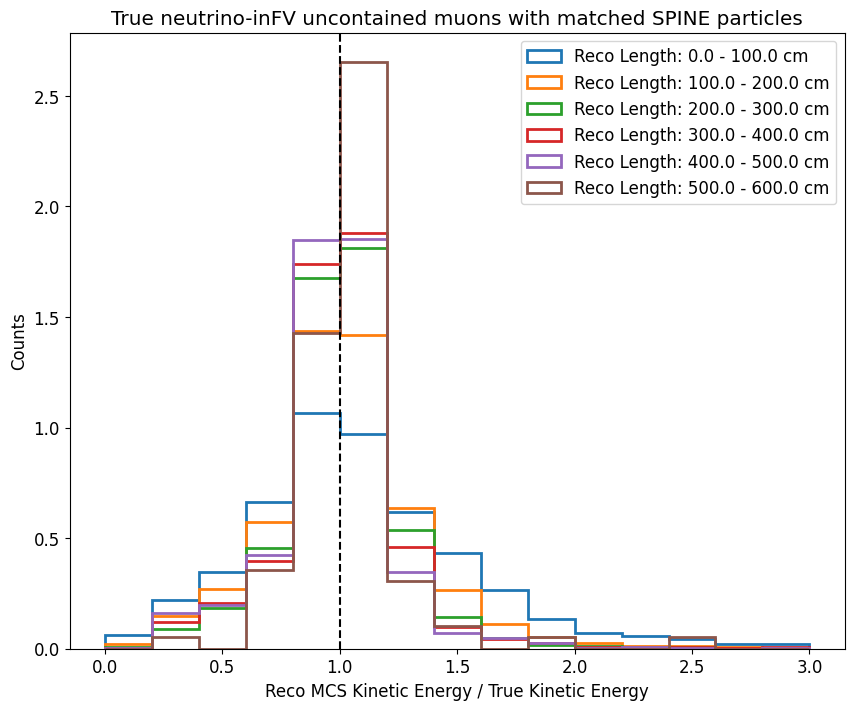

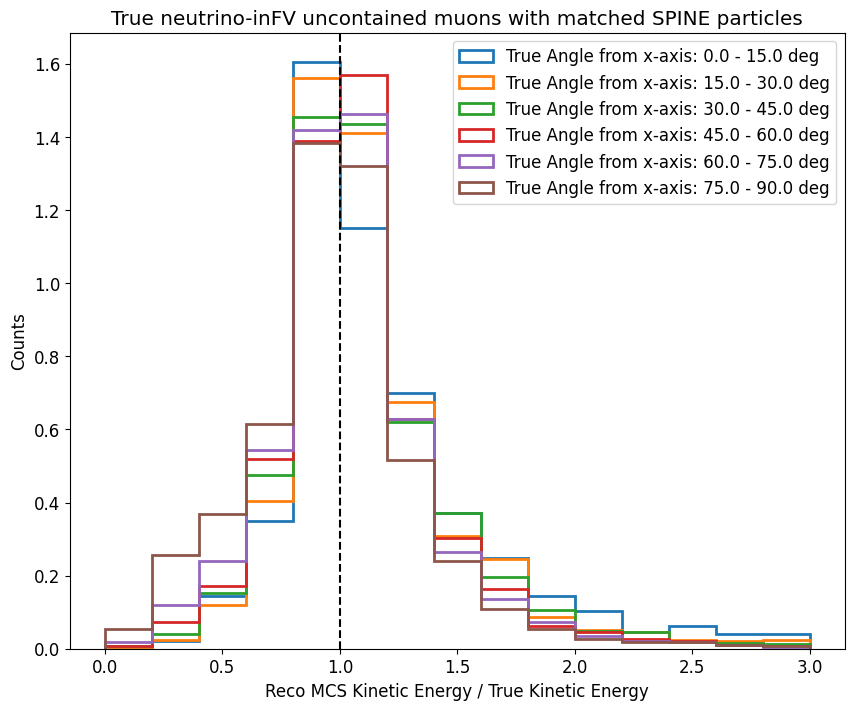

In [10]:
bins = np.linspace(0, 3, 16)

plt.figure(figsize=(10, 8))
plt.hist(uncontained_df['mcs_true_ratio'], bins=bins, histtype='step', lw=2)
plt.axvline(1, color='k', linestyle='--')
plt.xlabel("Reco MCS Kinetic Energy / True Kinetic Energy")
plt.ylabel("Counts")
plt.title("True neutrino-inFV uncontained muons with matched SPINE particles")
plt.show()

true_energy_bins = np.linspace(0, 3000, 6)
plt.figure(figsize=(10, 8))
for i in range(len(true_energy_bins) - 1):
    curr_df = uncontained_df.query(f'true_ke >= {true_energy_bins[i]} and true_ke < {true_energy_bins[i+1]}')
    plt.hist(curr_df['mcs_true_ratio'], bins=bins, histtype='step', lw=2, label=f'True KE: {true_energy_bins[i]} - {true_energy_bins[i+1]} MeV', density=True)
plt.axvline(1, color='k', linestyle='--')
plt.legend()
plt.xlabel("Reco MCS Kinetic Energy / True Kinetic Energy")
plt.ylabel("Counts")
plt.title("True neutrino-inFV uncontained muons with matched SPINE particles")
plt.show()

reco_length_bins = np.linspace(0, 600, 7)
plt.figure(figsize=(10, 8))
for i in range(len(reco_length_bins) - 1):
    curr_df = uncontained_df.query(f'matching_reco_particle_length >= {reco_length_bins[i]} and matching_reco_particle_length < {reco_length_bins[i+1]}')
    plt.hist(curr_df['mcs_true_ratio'], bins=bins, histtype='step', lw=2, label=f'Reco Length: {reco_length_bins[i]} - {reco_length_bins[i+1]} cm', density=True)
plt.axvline(1, color='k', linestyle='--')
plt.legend()
plt.xlabel("Reco MCS Kinetic Energy / True Kinetic Energy")
plt.ylabel("Counts")
plt.title("True neutrino-inFV uncontained muons with matched SPINE particles")
plt.show()

true_angle_bins = np.linspace(0, 90, 7)
plt.figure(figsize=(10, 8))
for i in range(len(true_angle_bins) - 1):
    curr_df = uncontained_df.query(f'true_angle_from_x_axis >= {true_angle_bins[i]} and true_angle_from_x_axis < {true_angle_bins[i+1]}')
    plt.hist(curr_df['mcs_true_ratio'], bins=bins, histtype='step', lw=2, label=f'True Angle from x-axis: {true_angle_bins[i]} - {true_angle_bins[i+1]} deg', density=True)
plt.axvline(1, color='k', linestyle='--')
plt.legend()
plt.xlabel("Reco MCS Kinetic Energy / True Kinetic Energy")
plt.ylabel("Counts")
plt.title("True neutrino-inFV uncontained muons with matched SPINE particles")
plt.show()


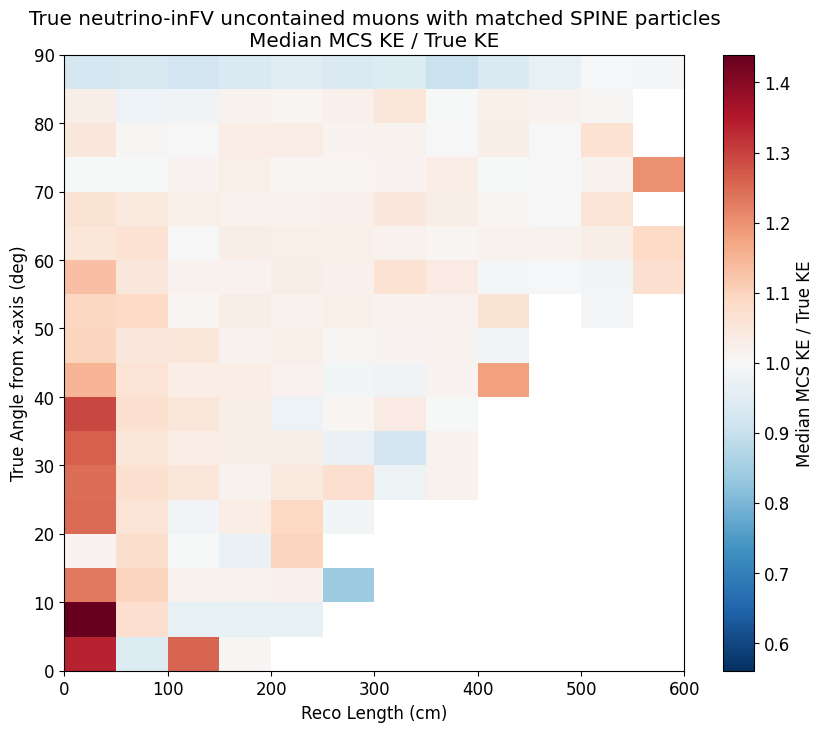

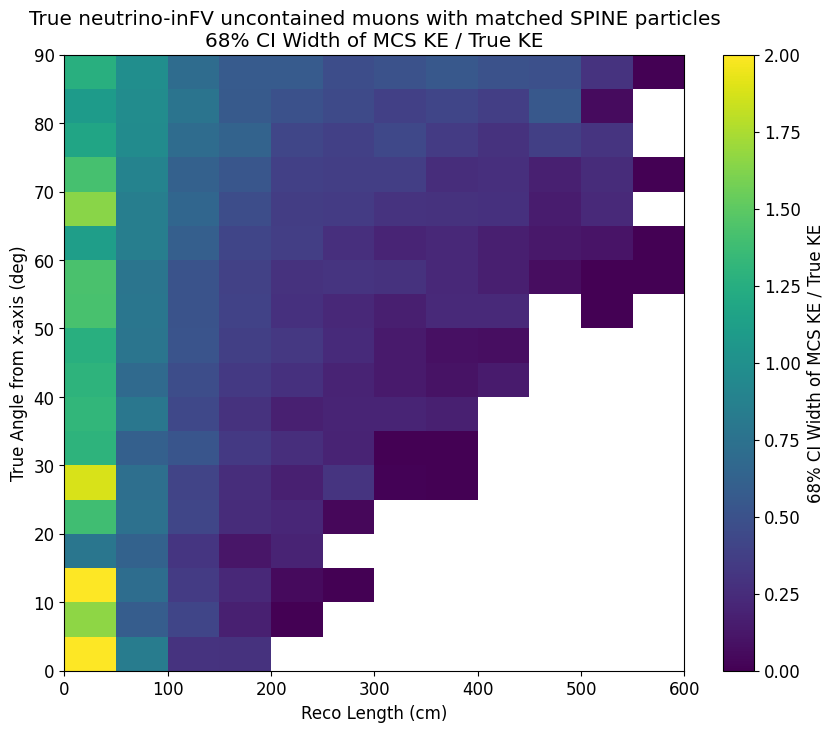

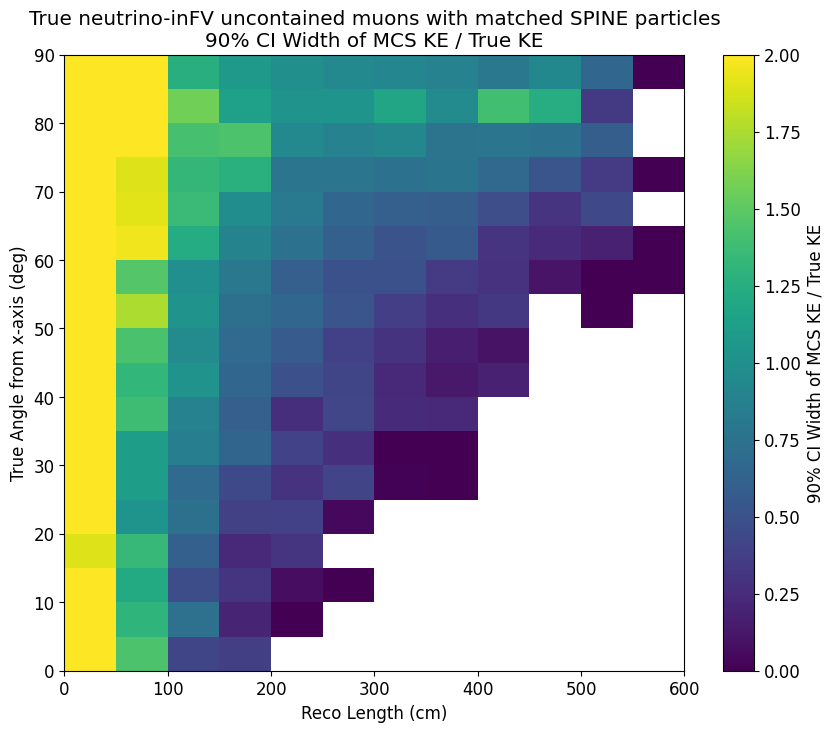

In [11]:
# 2D plot of median and 68% CI width of mcs_true_ratio as a function of reco_length and true_angle_from_x_dir

bins = (np.linspace(0, 600, 13), np.linspace(0, 90, 19))
xedges, yedges = bins[0], bins[1]

mcs_true_ratio_medians = np.zeros((len(bins[0])-1, len(bins[1])-1))
mcs_true_ratio_68_widths = np.zeros((len(bins[0])-1, len(bins[1])-1))
mcs_true_ratio_90_widths = np.zeros((len(bins[0])-1, len(bins[1])-1))

i_vals = uncontained_df['matching_reco_particle_length'].to_numpy()
j_vals = uncontained_df['true_angle_from_x_axis'].to_numpy()
z_vals = uncontained_df['mcs_true_ratio'].to_numpy()

for ibin in range(len(bins[0])-1):
    for jbin in range(len(bins[1])-1):
        curr_mask = (i_vals >= bins[0][ibin]) & (i_vals < bins[0][ibin+1]) & (j_vals >= bins[1][jbin]) & (j_vals < bins[1][jbin+1])
        curr_vals = z_vals[curr_mask]
        if len(curr_vals) == 0:
            mcs_true_ratio_medians[ibin, jbin] = np.nan
            mcs_true_ratio_68_widths[ibin, jbin] = np.nan
            mcs_true_ratio_90_widths[ibin, jbin] = np.nan
        else:
            mcs_true_ratio_medians[ibin, jbin] = np.median(curr_vals)
            mcs_true_ratio_68_widths[ibin, jbin] = np.percentile(curr_vals, 84) - np.percentile(curr_vals, 16)
            mcs_true_ratio_90_widths[ibin, jbin] = np.percentile(curr_vals, 95) - np.percentile(curr_vals, 5)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xedges, yedges, mcs_true_ratio_medians.T, cmap='RdBu_r', norm=mpl.colors.CenteredNorm(vcenter=1.0), shading='auto')
plt.colorbar(label='Median MCS KE / True KE')
plt.xlabel("Reco Length (cm)")
plt.ylabel("True Angle from x-axis (deg)")
plt.title("True neutrino-inFV uncontained muons with matched SPINE particles\nMedian MCS KE / True KE")
plt.show()

plt.figure(figsize=(10, 8))
plt.pcolormesh(xedges, yedges, mcs_true_ratio_68_widths.T, cmap='viridis', shading='auto', vmin=0, vmax=2)
plt.colorbar(label='68% CI Width of MCS KE / True KE')
plt.xlabel("Reco Length (cm)")
plt.ylabel("True Angle from x-axis (deg)")
plt.title("True neutrino-inFV uncontained muons with matched SPINE particles\n68% CI Width of MCS KE / True KE")
plt.show()

plt.figure(figsize=(10, 8))
plt.pcolormesh(xedges, yedges, mcs_true_ratio_90_widths.T, cmap='viridis', shading='auto', vmin=0, vmax=2)
plt.colorbar(label='90% CI Width of MCS KE / True KE')
plt.xlabel("Reco Length (cm)")
plt.ylabel("True Angle from x-axis (deg)")
plt.title("True neutrino-inFV uncontained muons with matched SPINE particles\n90% CI Width of MCS KE / True KE")
plt.show()


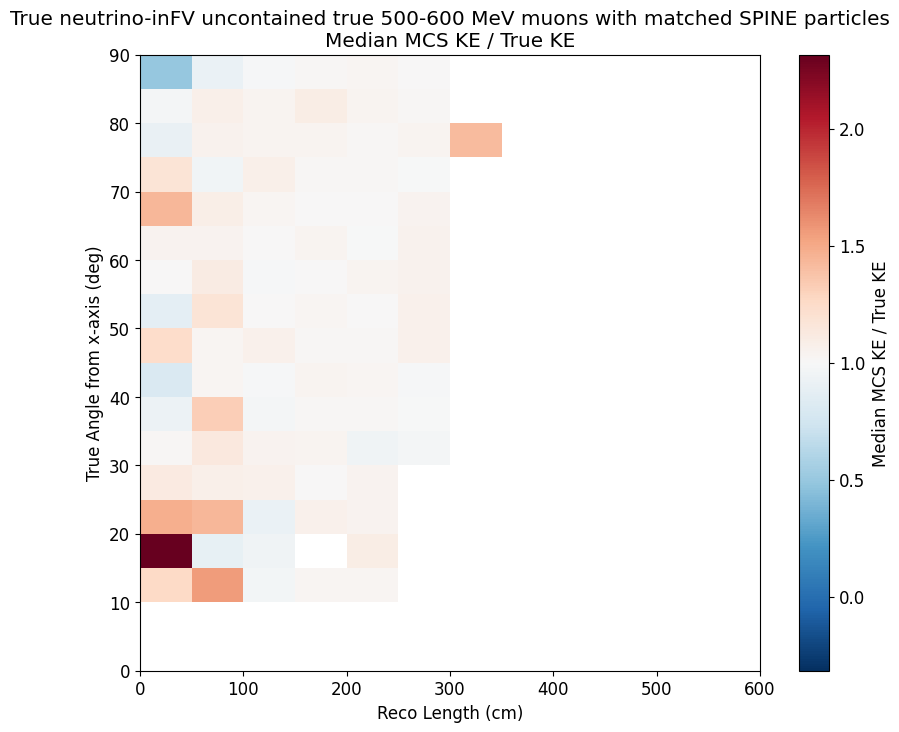

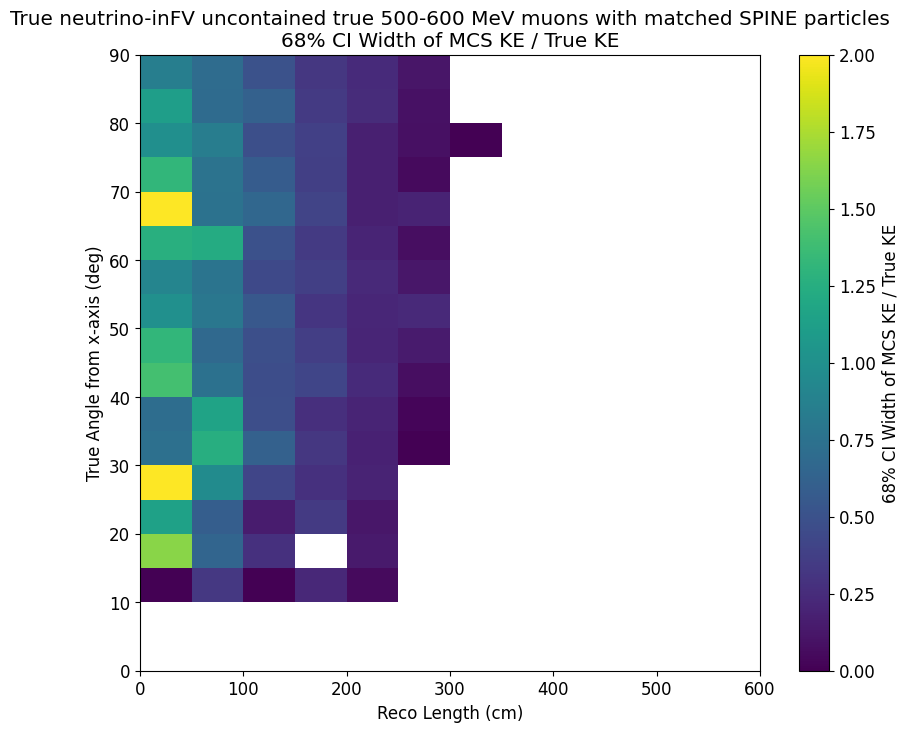

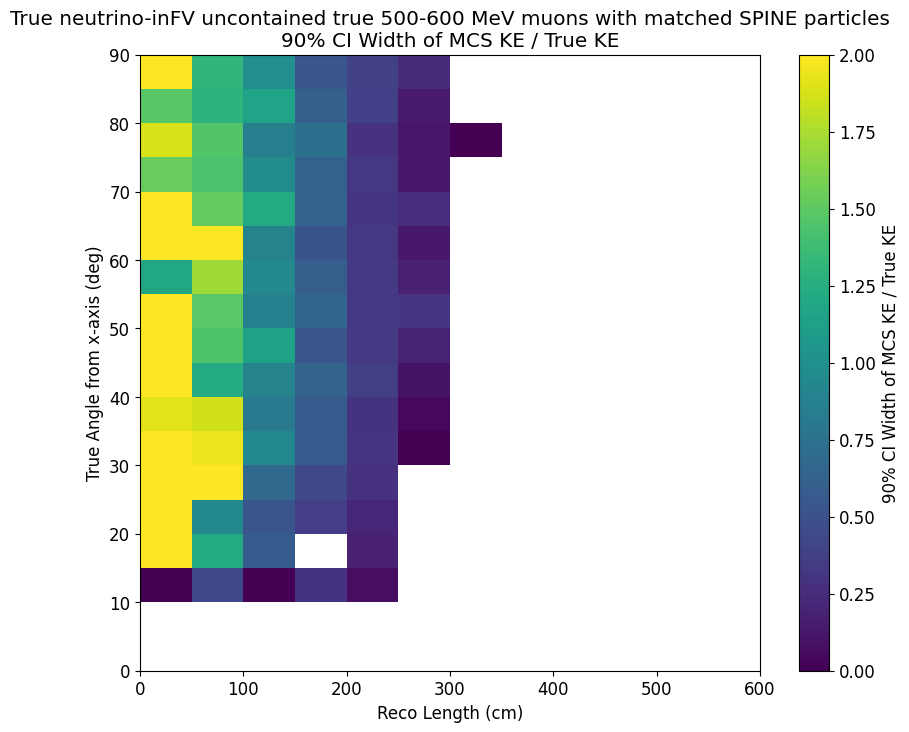

In [12]:
energy_range = (500, 600)

medium_energy_df = uncontained_df.query(f'true_ke >= {energy_range[0]} and true_ke < {energy_range[1]}')

bins = (np.linspace(0, 600, 13), np.linspace(0, 90, 19))
xedges, yedges = bins[0], bins[1]

mcs_true_ratio_medians = np.zeros((len(bins[0])-1, len(bins[1])-1))
mcs_true_ratio_68_widths = np.zeros((len(bins[0])-1, len(bins[1])-1))
mcs_true_ratio_90_widths = np.zeros((len(bins[0])-1, len(bins[1])-1))

i_vals = medium_energy_df['matching_reco_particle_length'].to_numpy()
j_vals = medium_energy_df['true_angle_from_x_axis'].to_numpy()
z_vals = medium_energy_df['mcs_true_ratio'].to_numpy()

for ibin in range(len(bins[0])-1):
    for jbin in range(len(bins[1])-1):
        curr_mask = (i_vals >= bins[0][ibin]) & (i_vals < bins[0][ibin+1]) & (j_vals >= bins[1][jbin]) & (j_vals < bins[1][jbin+1])
        curr_vals = z_vals[curr_mask]
        if len(curr_vals) == 0:
            mcs_true_ratio_medians[ibin, jbin] = np.nan
            mcs_true_ratio_68_widths[ibin, jbin] = np.nan
            mcs_true_ratio_90_widths[ibin, jbin] = np.nan
        else:
            mcs_true_ratio_medians[ibin, jbin] = np.median(curr_vals)
            mcs_true_ratio_68_widths[ibin, jbin] = np.percentile(curr_vals, 84) - np.percentile(curr_vals, 16)
            mcs_true_ratio_90_widths[ibin, jbin] = np.percentile(curr_vals, 95) - np.percentile(curr_vals, 5)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xedges, yedges, mcs_true_ratio_medians.T, cmap='RdBu_r', norm=mpl.colors.CenteredNorm(vcenter=1.0), shading='auto')
plt.colorbar(label='Median MCS KE / True KE')
plt.xlabel("Reco Length (cm)")
plt.ylabel("True Angle from x-axis (deg)")
plt.title(f"True neutrino-inFV uncontained true {energy_range[0]}-{energy_range[1]} MeV muons with matched SPINE particles\nMedian MCS KE / True KE")
plt.show()

plt.figure(figsize=(10, 8))
plt.pcolormesh(xedges, yedges, mcs_true_ratio_68_widths.T, cmap='viridis', shading='auto', vmin=0, vmax=2)
plt.colorbar(label='68% CI Width of MCS KE / True KE')
plt.xlabel("Reco Length (cm)")
plt.ylabel("True Angle from x-axis (deg)")
plt.title(f"True neutrino-inFV uncontained true {energy_range[0]}-{energy_range[1]} MeV muons with matched SPINE particles\n68% CI Width of MCS KE / True KE")
plt.show()

plt.figure(figsize=(10, 8))
plt.pcolormesh(xedges, yedges, mcs_true_ratio_90_widths.T, cmap='viridis', shading='auto', vmin=0, vmax=2)
plt.colorbar(label='90% CI Width of MCS KE / True KE')
plt.xlabel("Reco Length (cm)")
plt.ylabel("True Angle from x-axis (deg)")
plt.title(f"True neutrino-inFV uncontained true {energy_range[0]}-{energy_range[1]} MeV muons with matched SPINE particles\n90% CI Width of MCS KE / True KE")
plt.show()

In [13]:
"""for i in range(2):
    if i == 0:
        curr_df = contained_df
        title = "True contained muons with matched SPINE particles"
        r = (0, 1000)
        bins = 100
    else:
        curr_df = uncontained_df
        title = "True uncontained muons with matched SPINE particles"
        r = (0, 5000)
        bins = 100

    plt.figure(figsize=(10, 8))
    plt.hist2d(curr_df['true_ke'], curr_df['matching_reco_particle_ke'], bins=bins, range=[r,r], norm=mpl.colors.LogNorm())
    plt.plot(r, r, 'k--')
    plt.colorbar(label='Counts')
    plt.xlim(r)
    plt.ylim(r)
    plt.xlabel('True Kinetic Energy (MeV)')
    plt.ylabel('Reco Kinetic Energy (MeV)')
    plt.title(title)
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.hist2d(curr_df['true_ke'], curr_df['matching_reco_particle_calo_ke'], bins=bins, range=[r,r], norm=mpl.colors.LogNorm())
    plt.plot(r, r, 'k--')
    plt.colorbar(label='Counts')
    plt.xlim(r)
    plt.ylim(r)
    plt.xlabel('True Kinetic Energy (MeV)')
    plt.ylabel('Reco Calorimetric Kinetic Energy (MeV)')
    plt.title(title)
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.hist2d(curr_df['true_ke'], curr_df['matching_reco_particle_mcs_ke'], bins=bins, range=[r,r], norm=mpl.colors.LogNorm())
    plt.plot(r, r, 'k--')
    plt.colorbar(label='Counts')
    plt.xlim(r)
    plt.ylim(r)
    plt.xlabel('True Kinetic Energy (MeV)')
    plt.ylabel('Reco MCS Kinetic Energy (MeV)')
    plt.title(title)
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.hist2d(curr_df['true_ke'], curr_df['matching_reco_particle_csda_ke'], bins=bins, range=[r,r], norm=mpl.colors.LogNorm())
    plt.plot(r, r, 'k--')
    plt.colorbar(label='Counts')
    plt.xlim(r)
    plt.ylim(r)
    plt.xlabel('True Kinetic Energy (MeV)')
    plt.ylabel('Reco Range Kinetic Energy (MeV)')
    plt.title(title)
    plt.show()
"""

'for i in range(2):\n    if i == 0:\n        curr_df = contained_df\n        title = "True contained muons with matched SPINE particles"\n        r = (0, 1000)\n        bins = 100\n    else:\n        curr_df = uncontained_df\n        title = "True uncontained muons with matched SPINE particles"\n        r = (0, 5000)\n        bins = 100\n\n    plt.figure(figsize=(10, 8))\n    plt.hist2d(curr_df[\'true_ke\'], curr_df[\'matching_reco_particle_ke\'], bins=bins, range=[r,r], norm=mpl.colors.LogNorm())\n    plt.plot(r, r, \'k--\')\n    plt.colorbar(label=\'Counts\')\n    plt.xlim(r)\n    plt.ylim(r)\n    plt.xlabel(\'True Kinetic Energy (MeV)\')\n    plt.ylabel(\'Reco Kinetic Energy (MeV)\')\n    plt.title(title)\n    plt.show()\n\n    plt.figure(figsize=(10, 8))\n    plt.hist2d(curr_df[\'true_ke\'], curr_df[\'matching_reco_particle_calo_ke\'], bins=bins, range=[r,r], norm=mpl.colors.LogNorm())\n    plt.plot(r, r, \'k--\')\n    plt.colorbar(label=\'Counts\')\n    plt.xlim(r)\n    plt.ylim(r